In [19]:
from obspy.core import UTCDateTime

In [20]:
# create a UTCDateTime object from a Python string
dt = UTCDateTime("2012-09-07T12:15:00")
print(dt, type(dt))

2012-09-07T12:15:00.000000Z <class 'obspy.core.utcdatetime.UTCDateTime'>


In [21]:
# add 20 seconds
dt += 20
print(dt)
print()
# get some datetime attributes
print("dt.date -> ", dt.date)
print("dt.time -> ", dt.time)
print("dt.year -> ", dt.year)
print("dt.month -> ", dt.month)
print("dt.day -> ", dt.day)
print("dt.hour -> ", dt.hour)
print("dt.minute -> ", dt.minute)
print("dt.second -> ", dt.second)
print("dt.timestamp -> ", dt.timestamp)
print("dt.weekday -> ", dt.weekday)

2012-09-07T12:15:20.000000Z

dt.date ->  2012-09-07
dt.time ->  12:15:20
dt.year ->  2012
dt.month ->  9
dt.day ->  7
dt.hour ->  12
dt.minute ->  15
dt.second ->  20
dt.timestamp ->  1347020120.0
dt.weekday ->  4


In [22]:
# create another UTCDateTime object
dt2 = UTCDateTime("2012-09-07T12:20:00")
print(dt2)
print()
# calculate the difference of the two UTCDateTime objects
diff = dt2 - dt
print(diff)

2012-09-07T12:20:00.000000Z

280.0


In [23]:
from obspy.core import read

In [24]:
# read an mseed file
st = read('20140404_200820_CH03.mseed')
print(st)

3 Trace(s) in Stream:
.CH03..E | 2014-04-04T20:08:20.000000Z - 2014-04-04T20:11:10.000000Z | 100.0 Hz, 17001 samples
.CH03..N | 2014-04-04T20:08:20.000000Z - 2014-04-04T20:11:10.000000Z | 100.0 Hz, 17001 samples
.CH03..Z | 2014-04-04T20:08:20.000000Z - 2014-04-04T20:11:10.000000Z | 100.0 Hz, 17001 samples


In [25]:
# get the first trace
first_trace = st[0]
# output the header information of that trace object
print(first_trace.stats)

         network: 
         station: CH03
        location: 
         channel: E
       starttime: 2014-04-04T20:08:20.000000Z
         endtime: 2014-04-04T20:11:10.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 17001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 34, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 417792})


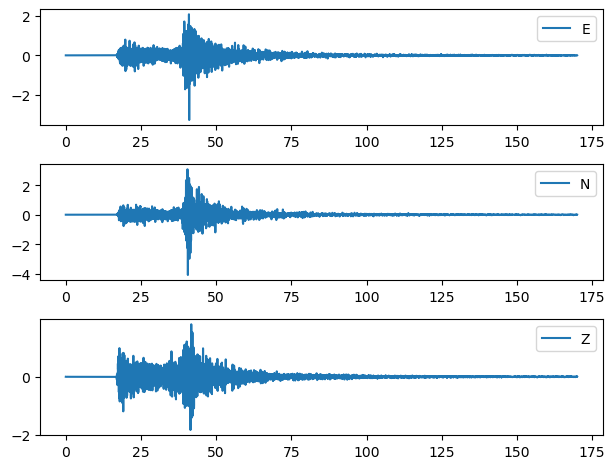

In [26]:
# import the matplotlib library
import matplotlib.pyplot as plt

# Initialize a matplotlib figure and axes with the total
# number of plots equal to the number of traces len(st)
fig, ax = plt.subplots(len(st), 1)

# Loop through all the traces in the stream object (st)
for n, tr in enumerate(st):
    # get the time information of the current trace
    xdata = tr.times()

    # get the data of the current trace
    ydata = tr.data

    # plot the graph with legend, the trace channel
    ax[n].plot(xdata, ydata, label=tr.stats.channel)

    # add the legend on the plot
    ax[n].legend()

# adjust the subplots so they do not overlap
plt.tight_layout()

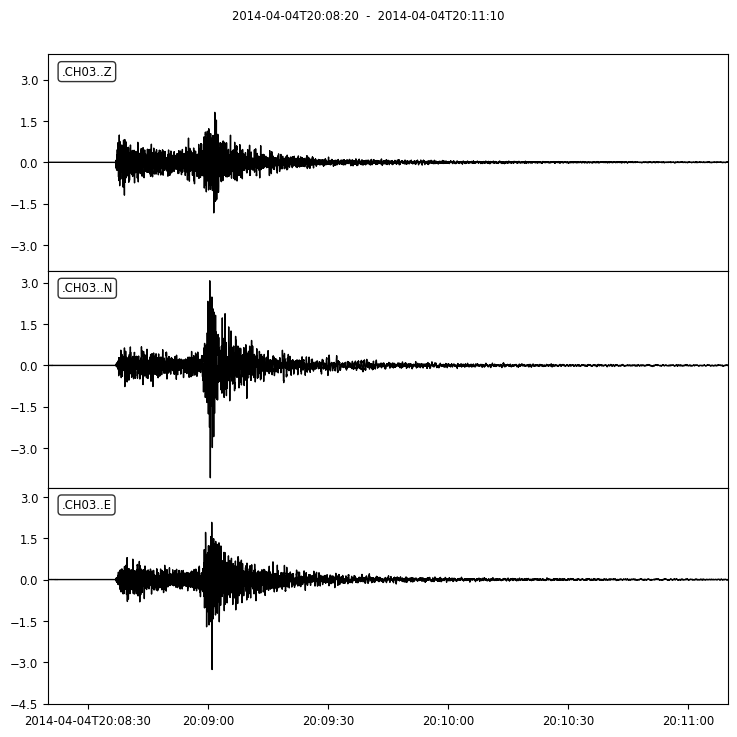

In [27]:
st.plot();

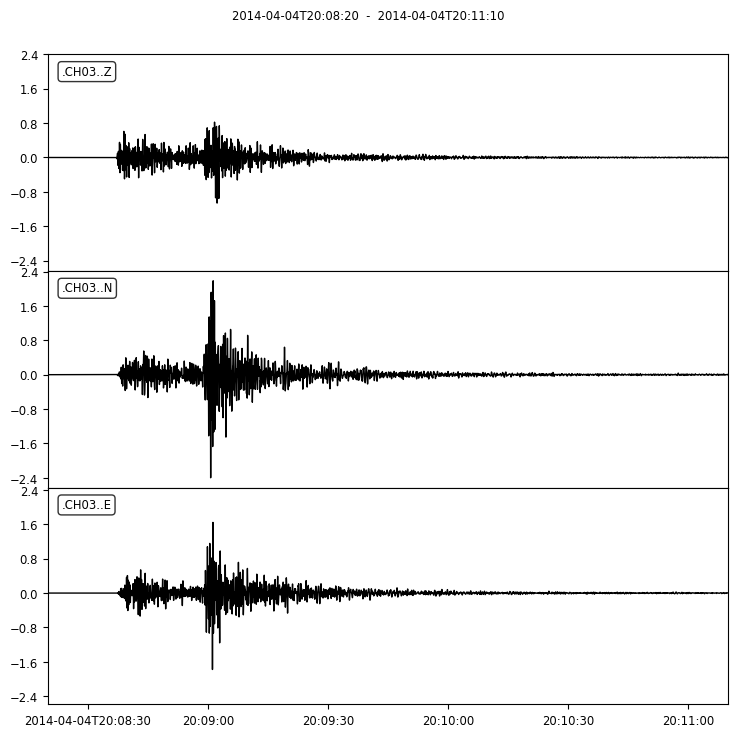

In [28]:
# apply an inplace bandpass filter of 1-3 Hz
st.filter('bandpass', freqmin=1, freqmax=5)
# plot the recordings
st.plot();

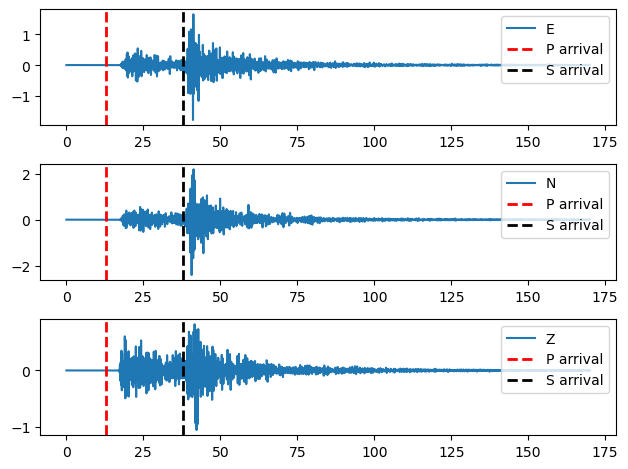

In [31]:
# Initialize a matplotlib figure and axes with the total
# number of plots equal to the number of traces len(st)
fig, ax = plt.subplots(len(st), 1)

# Define the P and S wave arrivals as UTCDateTime objects
Parr = UTCDateTime('2014-04-04 20:08:33')
Sarr = UTCDateTime('2014-04-04 20:08:58')

# Get the start date of the records from the first trace of the stream object
start_date = st[0].stats.starttime

# Calculate the P and S arrivals in seconds from the start date
Parr_sec = Parr - start_date
Sarr_sec = Sarr - start_date

# Loop through all the traces in the stream object (st)
for n, tr in enumerate(st):
    # get the time series time information of the current trace
    xdata = tr.times()
    # get the data of the current trace
    ydata = tr.data
    # plot the graph with legend, the trace channel
    ax[n].plot(xdata, ydata, label=tr.stats.channel)

    # add two vertical lines that represent the arrivals
    ax[n].axvline(x=Parr_sec, ymin=0, ymax=1, lw=2, ls='--', color='red', label='P arrival')
    ax[n].axvline(x=Sarr_sec, ymin=0, ymax=1, lw=2, ls='--', color='black', label='S arrival')

    # add the legend on the plot
    ax[n].legend(loc='upper right')
# adjust the subplots so they do not overlap
plt.tight_layout()

At this stage we define two windows to calculate the Fourier Spectra, one for the signal part of the waveform and one for the noise part.
            Both windows will share the same duration or length of 10 seconds. The first window 
            will start from the S wave arrival and the second one will begin 10 seconds before the P wave arrival. Let's visualize these windows: 

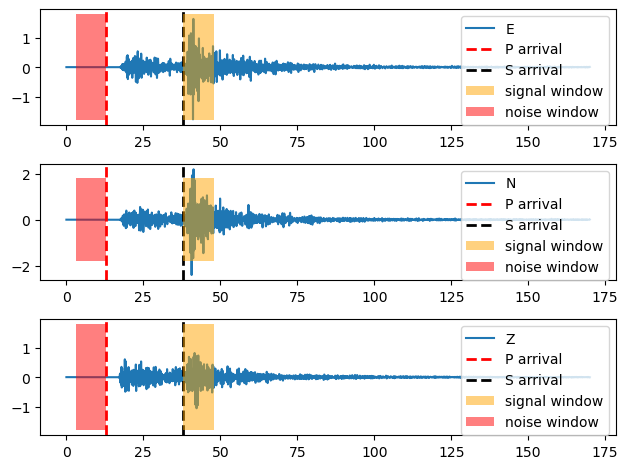

In [37]:
# Initialize a matplotlib figure and axes with the total
# number of plots equal to the number of traces len(st)
fig, ax = plt.subplots(len(st), 1)

# Define the P and S wave arrivals as UTCDateTime objects
Parr = UTCDateTime('2014-04-04 20:08:33')
Sarr = UTCDateTime('2014-04-04 20:08:58')

# Get the start date of the records from the first trace of the stream object
start_date = st[0].stats.starttime

# Calculate the P and S arrivals in seconds from the start date
Parr_sec = Parr - start_date
Sarr_sec = Sarr - start_date

# initialize the window length
window_length = 10

# Loop through all the traces in the stream object (st)
for n, tr in enumerate(st):
    # get the time series time information of the current trace
    xdata = tr.times()
    # get the data of the current trace
    ydata = tr.data
    # plot the graph with legend, the trace channel
    ax[n].plot(xdata, ydata, label=tr.stats.channel)

    # add two vertical lines that represent the arrivals
    ax[n].axvline(x=Parr_sec, ymin=0, ymax=1, lw=2, ls='--', color='red', label='P arrival')
    ax[n].axvline(x=Sarr_sec, ymin=0, ymax=1, lw=2, ls='--', color='black', label='S arrival')

    # create the signal and the noise window on the waveforms
    ax[n].fill_betweenx([-1.8,1.8], x1=Sarr_sec, x2=Sarr_sec+window_length, alpha=0.5, facecolor='orange', zorder=2, label='signal window')
    ax[n].fill_betweenx([-1.8,1.8], x1=Parr_sec-window_length, x2=Parr_sec, alpha=0.5, facecolor='red', zorder=2, label='noise window')

    # add the legend on the plot
    ax[n].legend(loc='upper right')
# adjust the subplots so they do not overlap
plt.tight_layout()

To continue, trim the waveforms at the two windows using the Obspy <code>trim()</code> function. Here's how you can do it in Python:

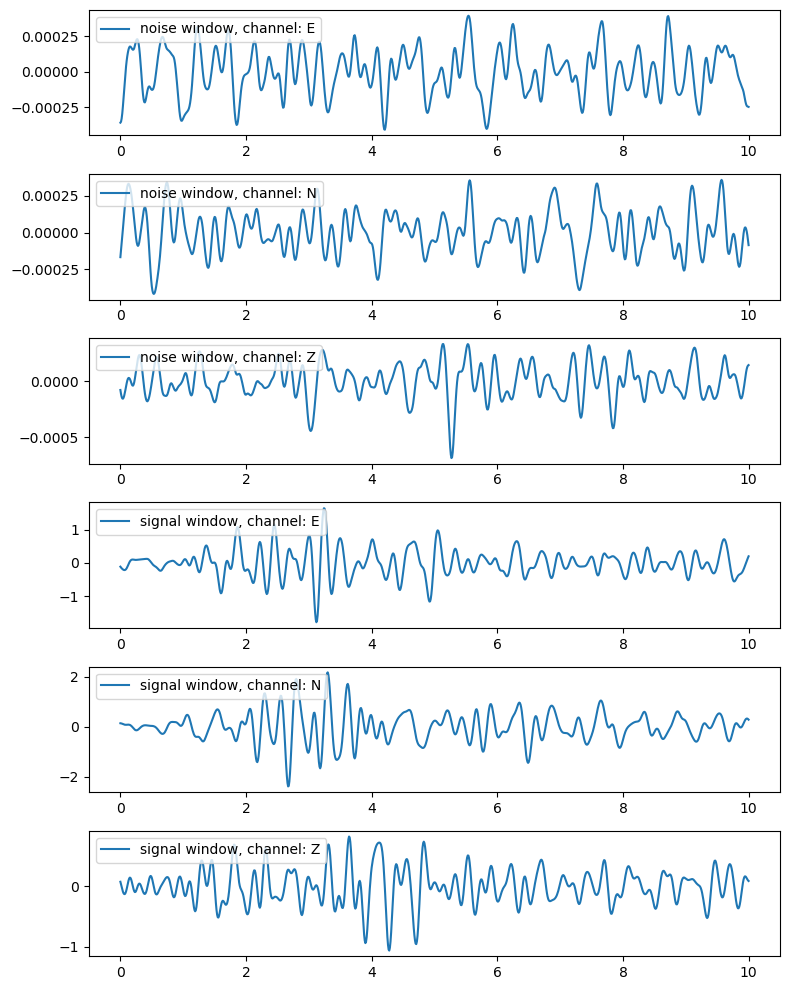

In [38]:
# Initialize a matplotlib figure and axes with the total
# number of plots equal to the number of traces plus 3
# a signal and a noise part for each trace (3) 
fig, ax = plt.subplots(len(st)+3, 1, figsize=(8,10))

# Define the P and S wave arrivals as UTCDateTime objects
Parr = UTCDateTime('2014-04-04 20:08:33')
Sarr = UTCDateTime('2014-04-04 20:08:58')

# Get the start date of the records from the first trace of the stream object
start_date = st[0].stats.starttime

# Calculate the P and S arrivals in seconds from the start date
Parr_sec = Parr - start_date
Sarr_sec = Sarr - start_date

# initialize the window length
window_length = 10

# trim the waveforms at the respective windows
# noise window: from Parr - window_length to Parr
# signal window: from Sarr to Sarr + window_length
# Since the trim() function happens inplace, create new streams
# using the copy() function to trim the traces separately
st_signal = st.copy().trim(starttime=start_date+Sarr_sec, endtime=start_date+Sarr_sec+window_length)
st_noise = st.copy().trim(starttime=start_date+Parr_sec-window_length, endtime=start_date+Parr_sec)

# Loop through all the traces in the noise Stream
# and plot them in the first 3 plots for each trace
for n, tr_noise in enumerate(st_noise):
    # get the time series time information of the current trace
    xdata = tr_noise.times()
    # get the data of the current trace
    ydata = tr_noise.data
    # plot the graph
    ax[n].plot(xdata, ydata, label=f'noise window, channel: {tr_noise.stats.channel}')
    ax[n].legend(loc='upper left')

# Loop through all the traces in the signal Stream
# and plot them for the next 3 plots for each trace
for n, tr_signal in enumerate(st_signal, start=3):
    # get the time series time information of the current trace
    xdata = tr_signal.times()
    # get the data of the current trace
    ydata = tr_signal.data
    # plot the graph
    ax[n].plot(xdata, ydata, label=f'signal window, channel: {tr_signal.stats.channel}')
    ax[n].legend(loc='upper left')

# adjust the subplots so they do not overlap
plt.tight_layout()

 Lastly, taper the waveforms, in order to smooth the left and the right side of the waveforms, using the obspy <code>taper()</code> function:

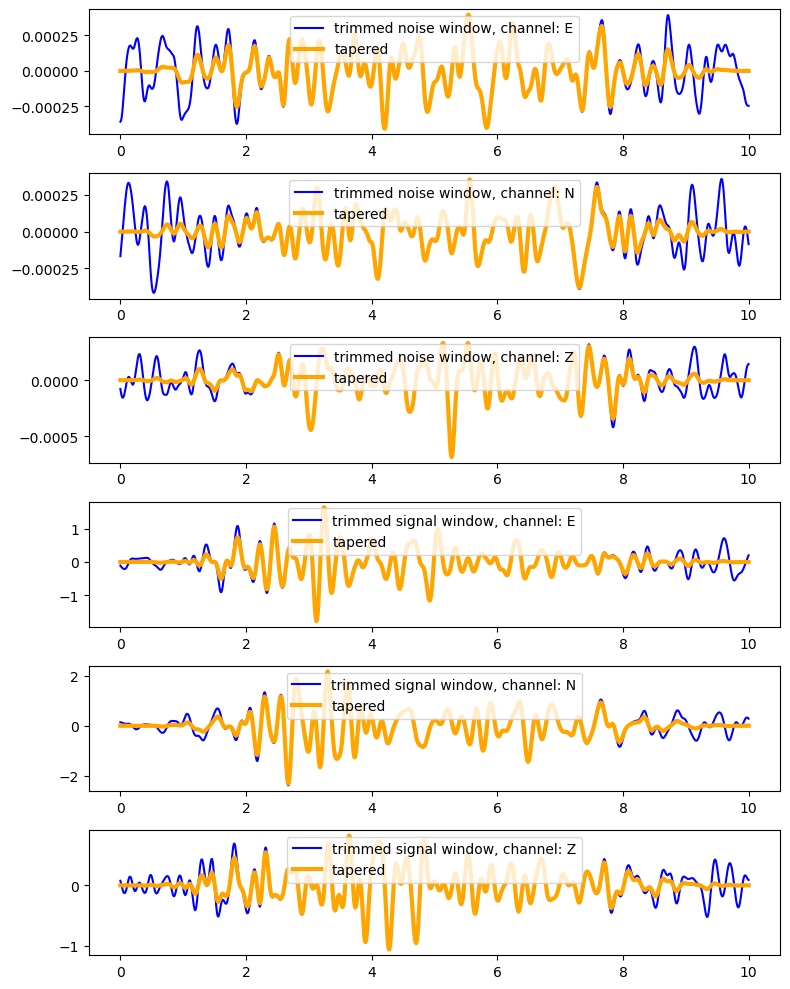

In [39]:
# Initialize a matplotlib figure and axes with the total
# number of plots equal to the number of traces len(st)
fig, ax = plt.subplots(len(st)+3, 1, figsize=(8,10))

# Define the P and S wave arrivals as UTCDateTime objects
Parr = UTCDateTime('2014-04-04 20:08:33')
Sarr = UTCDateTime('2014-04-04 20:08:58')

# Get the start date of the records from the first trace of the stream object
start_date = st[0].stats.starttime

# Calculate the P and S arrivals in seconds from the start date
Parr_sec = Parr - start_date
Sarr_sec = Sarr - start_date

# initialize the window length
window_length = 10

# trim the waveforms at the respective windows
# noise window: Parr - window_length to Parr
# signal window: Sarr to Sarr + window_length
# Since the trim() function happens inplace, create new streams
# using the copy() function to trim the traces separately
st_signal = st.copy().trim(starttime=start_date+Sarr_sec, endtime=start_date+Sarr_sec+window_length)
st_noise = st.copy().trim(starttime=start_date+Parr_sec-window_length, endtime=start_date+Parr_sec)

# taper the waveforms at the respective windows at 30% on the left and 30% on the right side
# again use the copy() function to apply the taper on new stream object
st_signal_taper = st_signal.copy().taper(side='both', max_percentage=0.3)
st_noise_taper = st_noise.copy().taper(side='both', max_percentage=0.3)

# Loop through the number of traces in the noise Stream
for i in range(len(st_noise)):
    # plot the trimmed waveforms with blue color
    ax[i].plot(st_noise[i].times(), st_noise[i].data, label=f'trimmed noise window, channel: {st_noise[i].stats.channel}', color="blue")
    # plot the tappered waveforms with orange color
    ax[i].plot(st_noise_taper[i].times(), st_noise_taper[i].data, label=f'tapered', lw=3, color="orange")
    ax[i].legend(loc='upper center')

# Loop through the number of traces in the signal Stream
for i in range(len(st_signal)):
    # plot the trimmed waveforms with blue color
    ax[i+3].plot(st_signal[i].times(), st_signal[i].data, label=f'trimmed signal window, channel: {st_signal[i].stats.channel}', color="blue")
    # plot the tappered waveforms with orange color
    ax[i+3].plot(st_signal_taper[i].times(), st_signal_taper[i].data, label=f'tapered', lw=3, color="orange")
    ax[i+3].legend(loc='upper center')

    # adjust the subplots so they do not overlap
    plt.tight_layout()

In [15]:
# write the tappered noise and signal stream object into a MiniSEED file
st_signal_taper.write("tappered_signal_waveform.mseed")
st_noise_taper.write("tappered_noise_waveform.mseed")

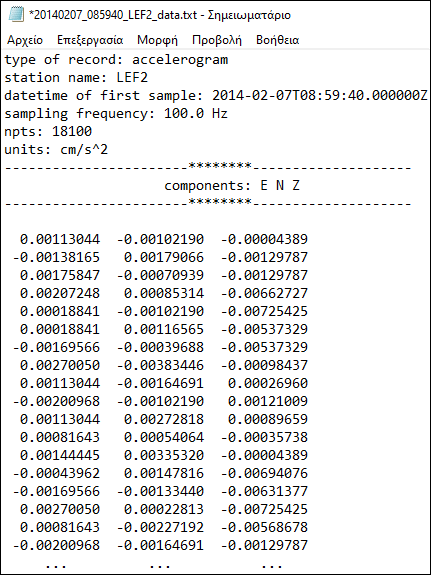

Start by reading the file and collecting the file header information in order to build a dictionary of the seismic parameters. Then extract the acceleration values 
            of the recording and transform them into a numpy <code>ndarray</code> form. Lastly, create one <code>Trace</code> for each recording and then a 
            <code>Stream</code> object from the traces.

In [18]:
import os
os.getcwd()

'C:\\Users\\Ioannis\\Desktop\\projects\\seismologywebsite\\seismologywebsite\\notebooks'

In [19]:
# open the file and read its metadata
with open('20140207_085940_LEF2_data.txt') as fr:
    # skip the first line
    fr.readline()
    # read the station name
    station = fr.readline().split(':')[1].strip()
    # read the starting date of the record
    dt_start = fr.readline().split(':', 1)[1].strip()
    # read the sampling frequency in Hz
    fs =  fr.readline().split(':')[1].strip(' Hz\n')
    # read the number of sample points
    npts = fr.readline().split(':')[1].strip()
    # skip 2 lines
    fr.readline()
    fr.readline()
    # read the components
    compos = fr.readline().split(':')[1].split()
    # show all the parameters that we read from the header of the file
    print(station, dt_start, fs, npts, compos)

LEF2 2014-02-07T08:59:40.000000Z 100.0 18100 ['E', 'N', 'Z']


Before we add the metadata into the dictionary, we convert the number of points (npts) into a Ptyhon <code>int</code> datatype, the
            sampling frequency (fs) into a <code>float</code> datatype and the start time of the record (<code>starttime</code>) into a <code>UTCDateTime</code> object.
            Also it is important for the keys of the dictionary, to be one of the options provided in the 
            <a target="_blank" href="https://docs.obspy.org/packages/autogen/obspy.core.trace.Stats.html"><code>obspy.core.trace.Stats</code> </a> object. 
            Then we use the python Pandas library to read the data of the record:

In [22]:
# use the Pandas read-csv method to read the data from text file
import pandas as pd

df_data = pd.read_csv('20140207_085940_LEF2_data.txt', skiprows=10, sep='\s+', header=None)
# assign the previous components list into the columns
df_data.columns = compos
print(df_data)

              E         N         Z
0      0.001130 -0.001022 -0.000044
1     -0.001382  0.001791 -0.001298
2      0.001758 -0.000709 -0.001298
3      0.002072  0.000853 -0.006627
4      0.000188 -0.001022 -0.007254
...         ...       ...       ...
18095 -0.003894  0.000853  0.002464
18096  0.001444  0.001478  0.006853
18097  0.000816  0.001791  0.008420
18098 -0.000754  0.002416  0.005286
18099  0.000816  0.001478  0.001210

[18100 rows x 3 columns]


At this time we have the metadata and the data of the traces. Using these two parameters, we can create the <code>Trace</code> objects. To do this, loop trough the components, create a header dictionary file for each <code>Trace</code> and add its data:

In [27]:
from obspy.core.trace import Trace
from obspy.core.stream import Stream

In [25]:
# create an empty list to append each trace object
lt_traces = []
# then create a trace for each component
for compo in compos:
    # create a dictionary object and add there the metadata
    dict_header = {}
    dict_header["station"] = station
    dict_header["npts"] = int(npts)
    dict_header["sampling_rate"] = float(fs)
    dict_header["starttime"] = UTCDateTime(dt_start)
    dict_header["channel"] = compo
    # create the trace object
    tr = Trace(data=df_data[compo].to_numpy(), header=dict_header)
    # append the trace into the traces list
    lt_traces.append(tr)
print(lt_traces)

[<obspy.core.trace.Trace object at 0x000001CCABCC5DB0>, <obspy.core.trace.Trace object at 0x000001CCABCC5060>, <obspy.core.trace.Trace object at 0x000001CCABCC6FB0>]


Finally, create the <code>Stream</code> object, from the list of the traces:

In [28]:
# create the stream by inserting the list of traces into the obspy.core.stream.Stream class
st = Stream(lt_traces)
print(st)

3 Trace(s) in Stream:
.LEF2..E | 2014-02-07T08:59:40.000000Z - 2014-02-07T09:02:40.990000Z | 100.0 Hz, 18100 samples
.LEF2..N | 2014-02-07T08:59:40.000000Z - 2014-02-07T09:02:40.990000Z | 100.0 Hz, 18100 samples
.LEF2..Z | 2014-02-07T08:59:40.000000Z - 2014-02-07T09:02:40.990000Z | 100.0 Hz, 18100 samples


In [55]:
from obspy.core import read
st = read('20140404_200820_CH03.mseed')
print(st)

3 Trace(s) in Stream:
.CH03..E | 2014-04-04T20:08:20.000000Z - 2014-04-04T20:11:10.000000Z | 100.0 Hz, 17001 samples
.CH03..N | 2014-04-04T20:08:20.000000Z - 2014-04-04T20:11:10.000000Z | 100.0 Hz, 17001 samples
.CH03..Z | 2014-04-04T20:08:20.000000Z - 2014-04-04T20:11:10.000000Z | 100.0 Hz, 17001 samples


In [56]:
len(st[0].data)

17001

In [57]:
st[0].stats

         network: 
         station: CH03
        location: 
         channel: E
       starttime: 2014-04-04T20:08:20.000000Z
         endtime: 2014-04-04T20:11:10.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 17001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 34, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 417792})

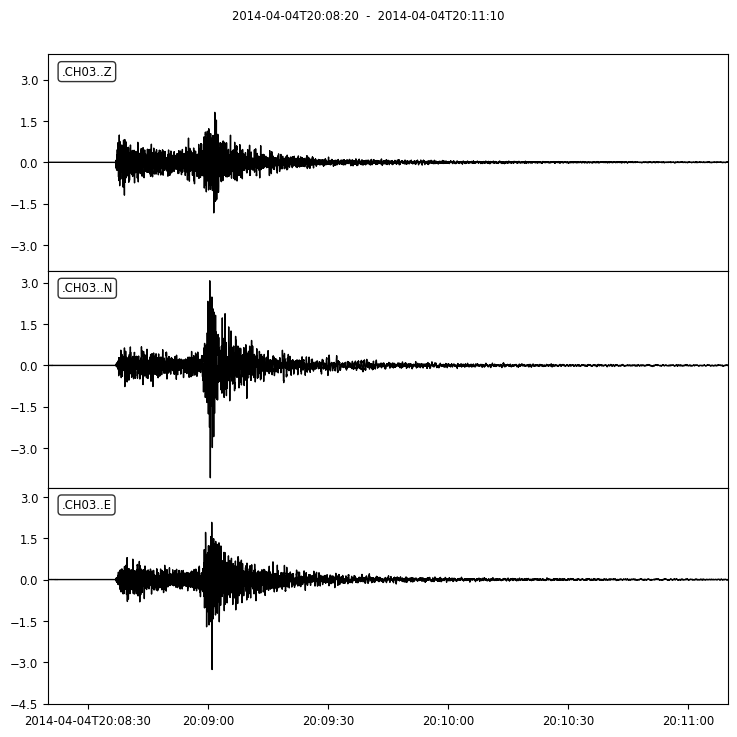

In [58]:
st.plot();

In [59]:
for tr in st:
    tr.stats.sampling_rate = 200
  

In [60]:
st[0].stats

         network: 
         station: CH03
        location: 
         channel: E
       starttime: 2014-04-04T20:08:20.000000Z
         endtime: 2014-04-04T20:09:45.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 17001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 34, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 417792})

In [61]:
len(st[0].data)

17001

In [26]:
from obspy.core import UTCDateTime
UTCDateTime("2014-04-04T20:08:20.000000Z") + 50

2014-04-04T20:09:10.000000Z

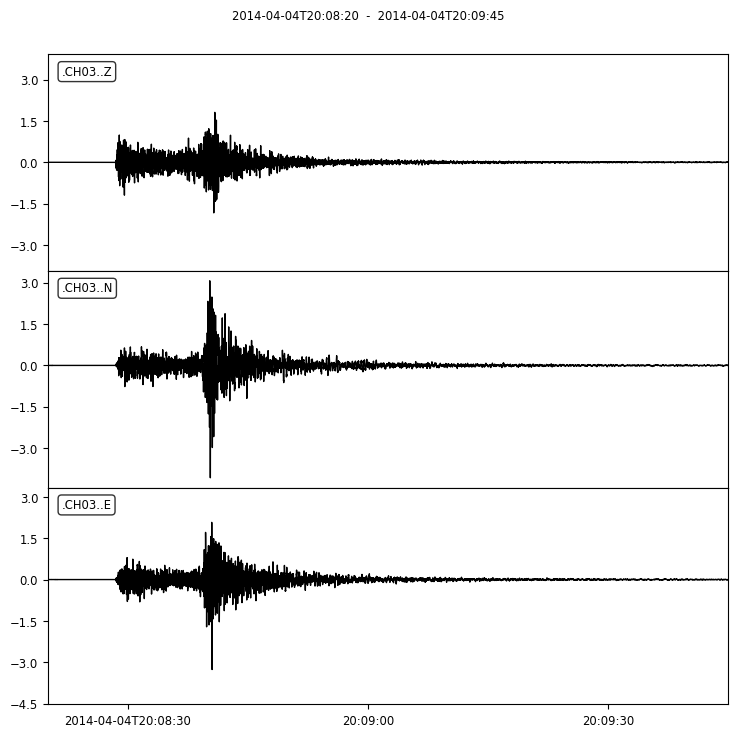

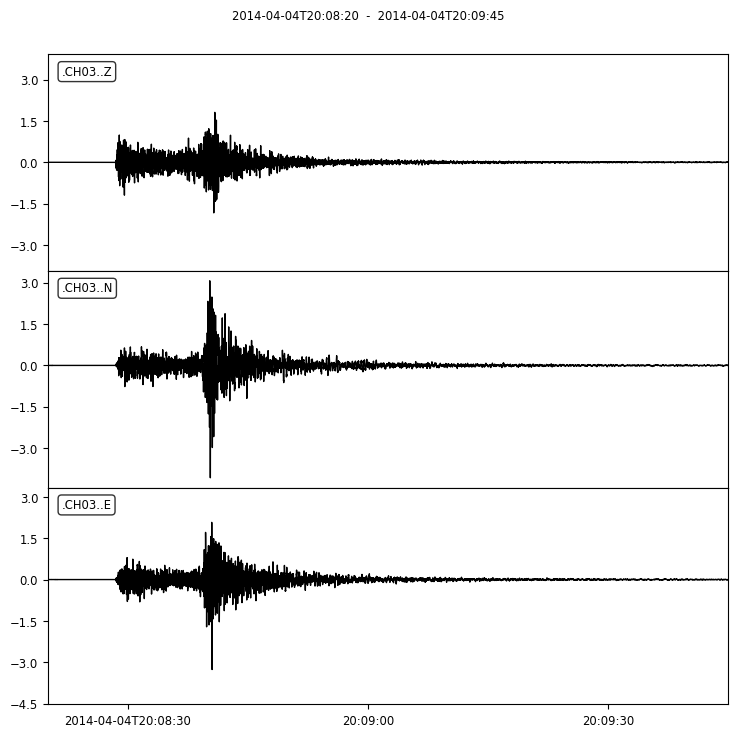

In [62]:
st.plot()